In [27]:
import os
import pickle
import sqlite3
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 1 - Logistic Regression
from sklearn.linear_model import LogisticRegression

# 2 - Support Vector Machine
from sklearn.svm import SVC

# 3 - Random forest
from sklearn.ensemble import RandomForestClassifier 

# 4 - Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# validation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [2]:
# Connect to database
path = os.path.join('..', 'Database', 'news.db')
conn = sqlite3.connect(path)
cursor = conn.cursor()

In [3]:
# Load TF-IDF features
cursor.execute("SELECT data FROM features WHERE type = 'tfidf'")
X_tfidf_compressed = cursor.fetchone()[0]
X_tfidf = pickle.loads(X_tfidf_compressed)
print("Features loaded successfully!")

Features loaded successfully!


In [4]:
# Load labels from the original dataset
df= pd.read_sql("SELECT id, label FROM cleanedText", conn) 
df['label'] = df['label'].apply(lambda x: 1 if x == head'real' else (0 if x == 'fake' else None))

In [5]:
# Assuming X_tfidf is the extracted features
y = df['label'].values # Labels (0: Fake, 1: Real) 

## Train Test Split 

In [6]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=1311)
print("Data split into training and testing sets!")
print("Train size: ", X_train.shape, "Test size: ", X_test.shape)

Data split into training and testing sets!
Train size:  (35918, 5000) Test size:  (8980, 5000)


## Train models

In [7]:
# Train onest model (Logistic Regression)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Predict 
y_pred = lr_model.predict(X_test)

In [9]:
# Evaluate accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.9880846325167038


In [10]:
# Train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [11]:
# Predict SVM model
y_pred = svm_model.predict(X_test)

In [12]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ SVM Accuracy:", accuracy)

✅ SVM Accuracy: 0.9951002227171493


In [13]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [14]:
# Predict
y_pred = rf_model.predict(X_test)

In [15]:
# Evaluate accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: ", accuracy)

Random Forest Accuracy:  0.9983296213808464


In [16]:
# Train Naïve Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred = nb_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ Naïve Bayes Accuracy:", accuracy)

✅ Naïve Bayes Accuracy: 0.9361915367483297


In [17]:
# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [18]:
# Predict
y_pred = nb_model.predict(X_test)

In [19]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy: ", accuracy)

Naive Bayes Accuracy:  0.9361915367483297


## Overfitting ?

In [21]:
# Calculate training accuracy
train_accuracy_lr = accuracy_score(y_train, lr_model.predict(X_train))
test_accuracy_lr = accuracy_score(y_test, lr_model.predict(X_test))

print (f"Logistic REgression: Train Accuracy = {train_accuracy_lr}, Test Accuracy = {test_accuracy_lr}")

Logistic REgression: Train Accuracy = 0.9910072943927836, Test Accuracy = 0.9880846325167038


In [22]:
train_accuracy_svm = accuracy_score(y_train, svm_model.predict(X_train))
test_accuracy_svm = accuracy_score(y_test, svm_model.predict(X_test))

print(f"SVM: Train Accuracy = {train_accuracy_svm}, Test Accuracy = {test_accuracy_svm}")

SVM: Train Accuracy = 0.9993874937357314, Test Accuracy = 0.9951002227171493


In [23]:
train_accuracy_rf = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy_rf = accuracy_score(y_test, rf_model.predict(X_test))

print(f"Random Forest: Train Accuracy = {train_accuracy_rf}, Test Accuracy = {test_accuracy_rf}")

Random Forest: Train Accuracy = 1.0, Test Accuracy = 0.9983296213808464


In [24]:
train_accuracy_nb = accuracy_score(y_train, nb_model.predict(X_train))
test_accuracy_nb = accuracy_score(y_test, nb_model.predict(X_test))

print(f"Naïve Bayes: Train Accuracy = {train_accuracy_nb}, Test Accuracy = {test_accuracy_nb}")

Naïve Bayes: Train Accuracy = 0.9343504649479369, Test Accuracy = 0.9361915367483297


Best model is: Logistic Regression

## Cross-Validation

In [26]:
# Perform 5-fold cross-validation for Logistic Regression
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5)

print(f"Logistic Regression Cross-Validation Accuracy: {cv_scores.mean()} ± {cv_scores.std()}")

Logistic Regression Cross-Validation Accuracy: 0.9860238322542678 ± 0.0017546921855980389


## Learning Curve

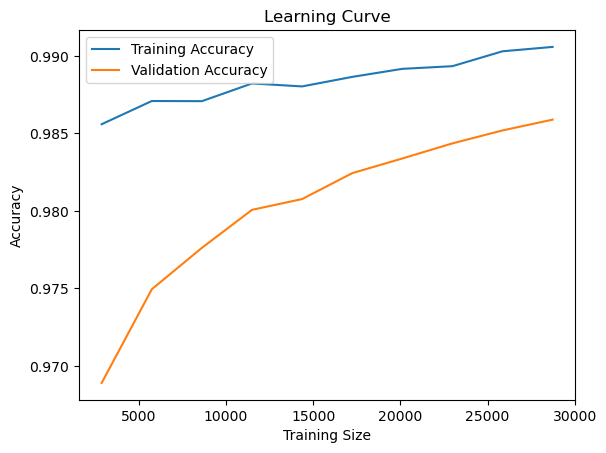

In [28]:
train_sizes, train_scores, test_scores = learning_curve(
    lr_model, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, test_mean, label="Validation Accuracy")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve")
plt.show()